## Time Series Project
## Earthquake Data Analysis

### Group Members:
**Aishwarya Hastak(ahastak@iu.edu)**\
**Manali Shelar(mvshelar@iu.edu)**\
Submitted by: Manali Shelar

Date: 04/04/2023

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from folium import plugins
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
earthquake_data = pd.read_csv('earthquakes.csv')


In [3]:
earthquake_data.shape

(6349, 38)

In [4]:
earthquake_data.describe()

Year           Mo           Dy           Hr           Mn  \
count  6349.000000  5939.000000  5783.000000  4300.000000  4095.000000   
mean   1808.959206     6.502273    15.754280    11.309302    28.756044   
std     374.072085     3.450480     8.733277     7.019042    17.172060   
min   -2150.000000     1.000000     1.000000     0.000000     0.000000   
25%    1823.000000     4.000000     8.000000     5.000000    14.000000   
50%    1930.000000     7.000000    16.000000    11.000000    29.000000   
75%    1990.000000     9.000000    23.000000    17.000000    43.500000   
max    2023.000000    12.000000    31.000000    23.000000    59.000000   

               Sec          Tsu          Vol     Latitude    Longitude  ...  \
count  4390.000000  1958.000000    77.000000  6297.000000  6297.000000  ...   
mean     20.160706  2304.057201  3702.662338    22.302839    38.101766  ...   
std      19.644601  1707.625296  2414.828427    22.901411    86.803671  ...   
min       0.000000     1.000000     1.000000   -62.877000  -179.984000  ...   
25%       0.000000  1025.500000  1346.000000     9.203000    -8.000000  ...   
50%      15.600000  1889.500000  3833.000000    31.959000    43.500000  ...   
75%      37.000000  3214.500000  5324.000000    38.700000   115.323000  ...   
max      59.900000  5873.000000  7542.000000    73.122000   180.000000  ...   

       Total Missing  Total Missing Description  Total Injuries  \
count      29.000000                  33.000000     1369.000000   
mean     1675.482759                   1.757576     2487.620891   
std      8048.092252                   1.031695    27034.506305   
min         1.000000                   1.000000        1.000000   
25%         5.000000                   1.000000       10.000000   
50%        25.000000                   1.000000       42.000000   
75%       138.000000                   3.000000      200.000000   
max     43476.000000                   4.000000   799000.000000   

       Total Injuries Description  Total Damage ($Mil)  \
count                 1594.000000           521.000000   
mean                     1.958595          1709.802088   
std                      1.078602         11684.116542   
min                      1.000000             0.010000   
25%                      1.000000             5.000000   
50%                      1.000000            28.000000   
75%                      3.000000           285.000000   
max                      4.000000        220136.600000   

       Total Damage Description  Total Houses Destroyed  \
count               3683.000000            8.890000e+02   
mean                   2.231876            1.778891e+04   
std                    1.019098            1.877183e+05   
min                    1.000000            1.000000e+00   
25%                    1.000000            6.700000e+01   
50%                    2.000000            5.060000e+02   
75%                    3.000000            3.400000e+03   
max                    4.000000            5.360000e+06   

       Total Houses Destroyed Description  Total Houses Damaged  \
count                         1931.000000          4.870000e+02   
mean                             2.685137          5.351718e+04   
std                              1.057067          9.519156e+05   
min                              1.000000          1.000000e+00   
25%                              2.000000          1.000000e+02   
50%                              3.000000          7.000000e+02   
75%                              3.000000          3.308500e+03   
max                              4.000000          2.100000e+07   

       Total Houses Damaged Description  
count                        964.000000  
mean                           2.532158  
std                            1.132913  
min                            1.000000  
25%                            1.000000  
50%                            3.000000  
75%                            4.000000  
max                            4.000

### Data Processing

In [5]:
earthqake_df = pd.DataFrame(earthquake_data)

In [6]:
# Remove duplicates
earthqake_df.drop_duplicates(inplace=True)

In [7]:
earthqake_df.tail()

Year   Mo    Dy    Hr    Mn   Sec     Tsu  Vol  \
6344  2023  1.0  28.0  18.0  14.0  45.0     NaN  NaN   
6345  2023  2.0   6.0   1.0  17.0  35.0  5873.0  NaN   
6346  2023  2.0   6.0  10.0  24.0  49.0     NaN  NaN   
6347  2023  2.0   9.0   6.0  28.0   0.0     NaN  NaN   
6348  2023  2.0  20.0  17.0   4.0  29.0     NaN  NaN   

                                    Location Name  Latitude  ...  \
6344                          IRAN:  KHVOY (KHOY)    38.424  ...   
6345                                TURKEY; SYRIA    37.166  ...   
6346                                TURKEY; SYRIA    38.024  ...   
6347  INDONESIA: NEW GUINEA: IRIAN JAYA: JAYAPURA    -2.635  ...   
6348                                TURKEY; SYRIA    36.109  ...   

      Total Missing  Total Missing Description  Total Injuries  \
6344            NaN                        NaN          1017.0   
6345            NaN                        NaN        206300.0   
6346            NaN                        NaN             NaN   
6347            NaN                        NaN             NaN   
6348            NaN                        NaN           200.0   

      Total Injuries Description  Total Damage ($Mil)  \
6344                         4.0                  NaN   
6345                         4.0                  NaN   
6346                         NaN                  NaN   
6347                         NaN                  NaN   
6348                         3.0                  NaN   

      Total Damage Description  Total Houses Destroyed  \
6344                       3.0                   370.0   
6345                       4.0                100000.0   
6346                       NaN                     NaN   
6347                       1.0                    15.0   
6348                       NaN                     NaN   

      Total Houses Destroyed Description  Total Houses Damaged  \
6344                                 3.0                   NaN   
6345                                 4.0                   NaN   
6346                                 NaN                   NaN   
6347                                 1.0                  28.0   
6348                                 NaN                   NaN   

      Total Houses Damaged Description  
6344                               4.0  
6345                               4.0  
6346                               NaN  
6347                               1.0  
6348                               NaN  

[5 rows x 38 columns]

In [8]:
# Drop the columns with missing values
missing_percentages = earthqake_df.isna().sum() / len(earthqake_df)

# select columns where the percentage of missing values is less than or equal to 0.75
selected_columns = missing_percentages[missing_percentages <= 0.75].index

earthqake_df = earthqake_df[selected_columns]

In [9]:
earthqake_df.tail()

Year   Mo    Dy    Hr    Mn   Sec     Tsu  \
6344  2023  1.0  28.0  18.0  14.0  45.0     NaN   
6345  2023  2.0   6.0   1.0  17.0  35.0  5873.0   
6346  2023  2.0   6.0  10.0  24.0  49.0     NaN   
6347  2023  2.0   9.0   6.0  28.0   0.0     NaN   
6348  2023  2.0  20.0  17.0   4.0  29.0     NaN   

                                    Location Name  Latitude  Longitude  ...  \
6344                          IRAN:  KHVOY (KHOY)    38.424     44.909  ...   
6345                                TURKEY; SYRIA    37.166     37.042  ...   
6346                                TURKEY; SYRIA    38.024     37.203  ...   
6347  INDONESIA: NEW GUINEA: IRIAN JAYA: JAYAPURA    -2.635    140.557  ...   
6348                                TURKEY; SYRIA    36.109     36.017  ...   

      MMI Int   Deaths  Death Description  Damage Description  \
6344      8.0      3.0                1.0                 3.0   
6345      9.0  48224.0                4.0                 4.0   
6346      9.0      NaN                NaN                 NaN   
6347      8.0      4.0                1.0                 1.0   
6348      9.0      6.0                1.0                 NaN   

      Houses Destroyed Description  Total Deaths  Total Death Description  \
6344                           3.0           3.0                      1.0   
6345                           4.0       48224.0                      4.0   
6346                           NaN           NaN                      NaN   
6347                           1.0           4.0                      1.0   
6348                           NaN           6.0                      1.0   

      Total Injuries Description  Total Damage Description  \
6344                         4.0                       3.0   
6345                         4.0                       4.0   
6346                         NaN                       NaN   
6347                         NaN                       1.0   
6348                         3.0                       NaN   

      Total Houses Destroyed Description  
6344                                 3.0  
6345                                 4.0  
6346                                 NaN  
6347                                 1.0  
6348                                 NaN  

[5 rows x 22 columns]

In [23]:
earthqake_df.shape

(5747, 23)

# 1. Time Series Decomposition

In [11]:
earthqake_df.tail(3)

Year   Mo    Dy    Hr    Mn   Sec  Tsu  \
6346  2023  2.0   6.0  10.0  24.0  49.0  NaN   
6347  2023  2.0   9.0   6.0  28.0   0.0  NaN   
6348  2023  2.0  20.0  17.0   4.0  29.0  NaN   

                                    Location Name  Latitude  Longitude  ...  \
6346                                TURKEY; SYRIA    38.024     37.203  ...   
6347  INDONESIA: NEW GUINEA: IRIAN JAYA: JAYAPURA    -2.635    140.557  ...   
6348                                TURKEY; SYRIA    36.109     36.017  ...   

      MMI Int  Deaths  Death Description  Damage Description  \
6346      9.0     NaN                NaN                 NaN   
6347      8.0     4.0                1.0                 1.0   
6348      9.0     6.0                1.0                 NaN   

      Houses Destroyed Description  Total Deaths  Total Death Description  \
6346                           NaN           NaN                      NaN   
6347                           1.0           4.0                      1.0   
6348                           NaN           6.0                      1.0   

      Total Injuries Description  Total Damage Description  \
6346                         NaN                       NaN   
6347                         NaN                       1.0   
6348                         3.0                       NaN   

      Total Houses Destroyed Description  
6346                                 NaN  
6347                                 1.0  
6348                                 NaN  

[3 rows x 22 columns]

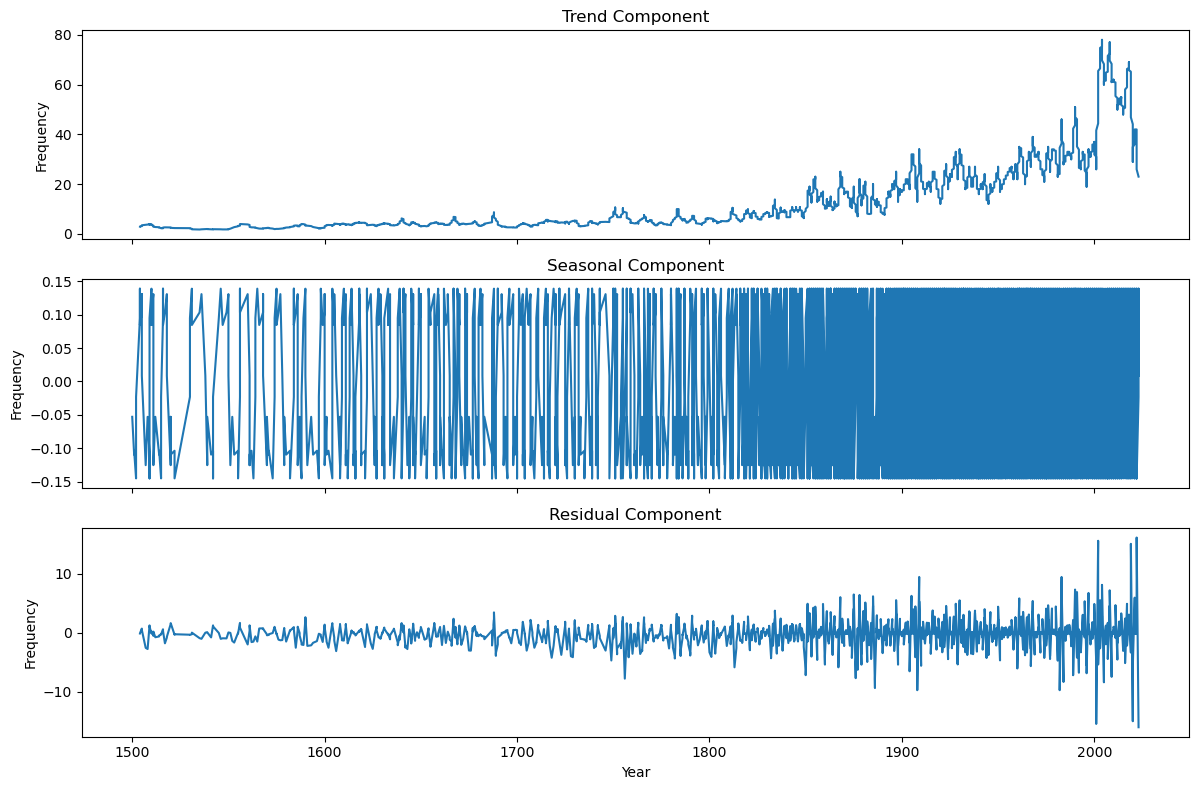

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

earthqake_df = earthqake_df[earthqake_df['Year'] >= 1500]
earthqake_df['Count'] = earthqake_df.groupby('Year')['Year'].transform('count')
earthqake_temp = earthqake_df.dropna(subset=['Count','Mo'], how='any')
earthqake_temp = earthqake_temp[['Year','Count','Mo']]
earthqake_temp['Year'] = earthqake_temp['Year'].fillna(0).astype(int)
earthqake_temp['Count'] = earthqake_temp['Count'].fillna(0).astype(int)
earthqake_temp['Mo'] = earthqake_temp['Mo'].fillna(0).astype(int)
earthqake_temp.set_index('Year', inplace=True)

result = seasonal_decompose(earthqake_temp['Count'], period=12, model='additive')

fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot the trend component
result.trend.plot(ax=axs[0], label='Trend')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Trend Component')

# Plot the seasonal component
result.seasonal.plot(ax=axs[1], label='Seasonality')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Seasonal Component')

# Plot the residual component
result.resid.plot(ax=axs[2], label='Residual')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Residual Component')

plt.tight_layout()
plt.show()

# 2. Time Series Visualization

## Number of Earthquakes per Year

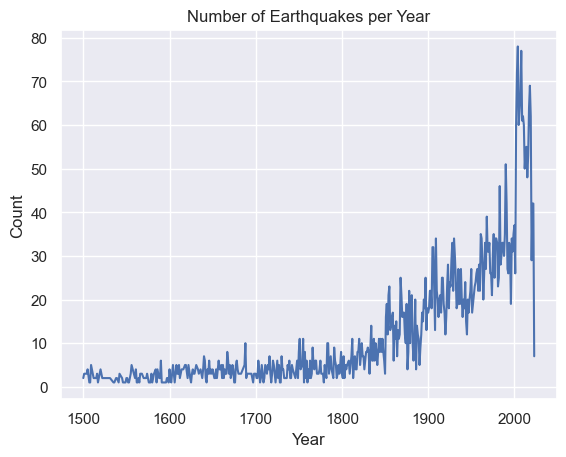

In [74]:
plt.plot(earthqake_temp.index, earthqake_temp['Count'])
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Most Active Earthquake Regions

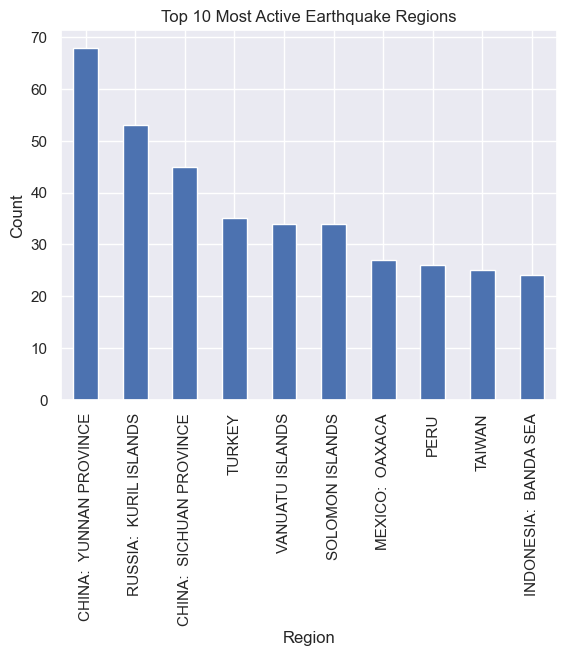

In [75]:
counts = earthqake_df.groupby('Location Name')['Location Name'].count().sort_values(ascending=False)
counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Active Earthquake Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

## Earthquake Frequency by Location and Year

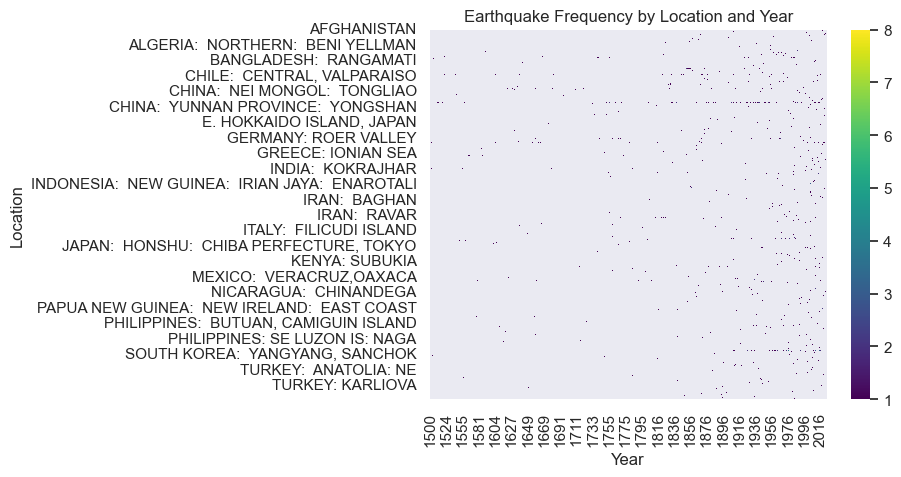

In [76]:
earthqake_map = earthqake_df.pivot_table(values='Count', index='Location Name', columns='Year', aggfunc='count')
sns.heatmap(earthqake_map, cmap='viridis')
plt.title('Earthquake Frequency by Location and Year')
plt.xlabel('Year')
plt.ylabel('Location')
plt.show()

## Earthquake Locations

In [84]:
earthqake_map = earthqake_df[earthqake_df['Mag'] >= 5.0]
hover_data = ['Mag', 'Total Deaths']
fig = px.scatter_geo(earthqake_map, lat='Latitude', lon='Longitude', color='Mag', size='Mag', hover_name='Location Name', hover_data=hover_data)
fig.show()

## Earthquake Frequency by Location and Magnitude

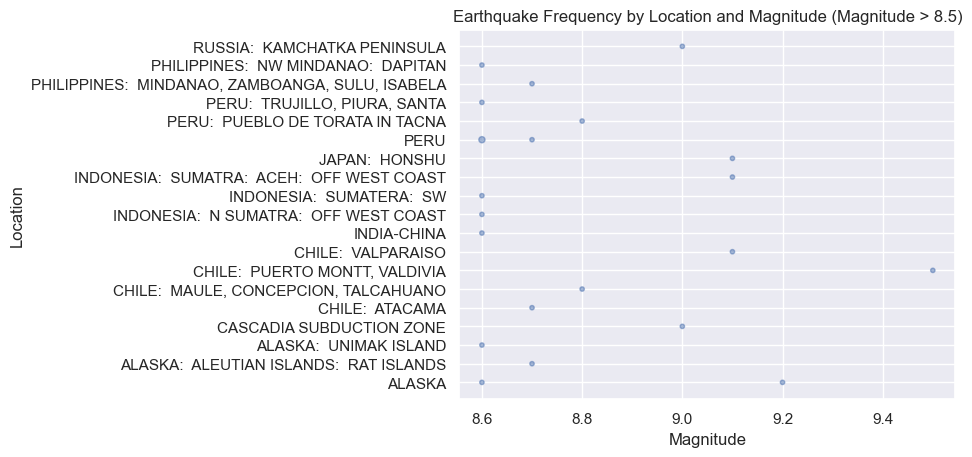

In [91]:
earthqake_counts = earthqake_df[earthqake_df['Mag'] > 8.5].groupby(['Location Name', 'Mag'])['Count'].count().reset_index()
plt.scatter(earthqake_counts['Mag'], earthqake_counts['Location Name'], s=earthqake_counts['Count']*10, alpha=0.5)
plt.title('Earthquake Frequency by Location and Magnitude (Magnitude > 8.5)')
plt.xlabel('Magnitude')
plt.ylabel('Location')
plt.show()

## Major Earthquakes Worldwide with Magnitude Greater than 7

In [16]:
import folium

# Major Earthquakes Worldwide(With Magnitude Greater Than 7)

# Create a map centered on the latitude and longitude
center_lat = earthqake_df['Latitude'].mean()
center_lon = earthqake_df['Longitude'].mean()
map = folium.Map(location=[center_lat, center_lon], zoom_start=3)

# Plot map
for i, row in earthqake_df[earthqake_df['Mag'] > 7].iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=10,
                        color='red',
                        fill=True,
                        fill_color=row['Mag'],
                        fill_opacity=0.7,
                        tooltip=f"Magnitude: {row['Mag']}"
                       ).add_to(map)

# Display the map
map

## Earthquake Fatalities in and around Tokyo

In [45]:
# Create an map centered on Tokyo
map_scale = folium.Map(location=[35.6809591, 139.7673068], tiles='CartoDB positron', zoom_start=8.0, min_zoom=2.0)

# add circle markers to the map
for index, row in earthquake_data.iterrows():
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
        position = [row['Latitude'], row['Longitude']]
        deaths = row['Total Deaths']
        
        if pd.notna(deaths) and deaths > 0:
            folium.Circle(location=position, radius=deaths, color='red', fill=True).add_to(map_scale)

# Display the map
map_scale

## Heatmap of Earthquake Distribution

In [60]:
earthquake_loc=earthqake_df.loc[earthqake_df['Mag'] > 7, ['Latitude', 'Longitude']]
earthquake_loc.dropna(inplace=True)

In [61]:
# Create a map centered on (0, 120) and zoomed out to level 2
eq_map = folium.Map(location=[0, 120], tiles='Stamen Terrain', zoom_start=2)

# Add a heatmap layer to the map using the earthquake data
heatmap_layer = folium.plugins.HeatMap(earthquake_loc)
eq_map.add_child(heatmap_layer)

eq_map

## Scatterplot of Earthquake Magnitude over TIme

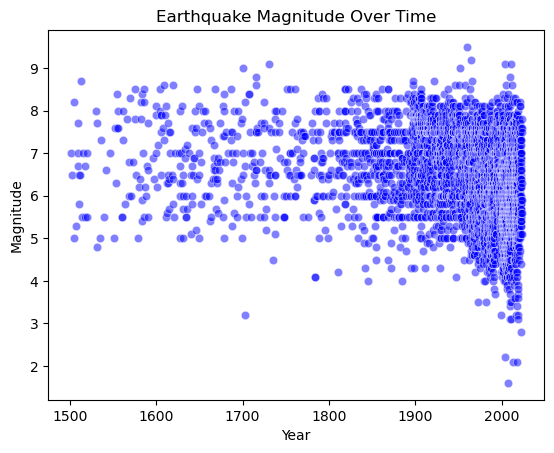

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

earthqake_df = earthqake_df[earthqake_df['Year'] >= 0]
# Create a scatter plot of Year vs. Mag 
sns.scatterplot(x='Year', y='Mag', data=earthqake_df, color='blue', alpha=0.5)

plt.title('Earthquake Magnitude Over Time')
plt.xlabel('Year')
plt.ylabel('Magnitude')

# Show the plot
plt.show()

## Scatter plot of earthquakes by year and deaths

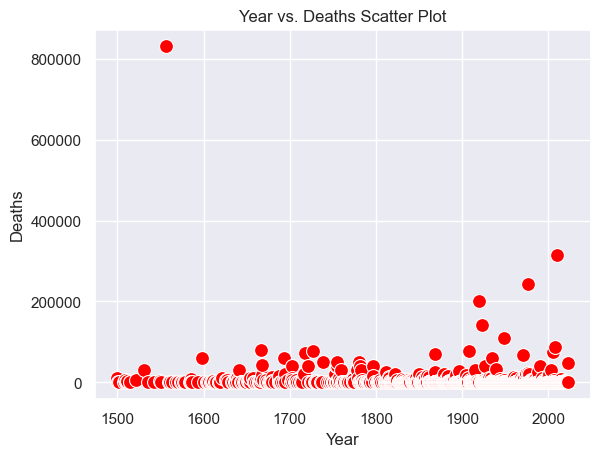

In [63]:
# Scatter plot of year Vs deaths
earthqake_df = earthqake_df[earthqake_df['Year'] >= 1500] 

sns.set(style='darkgrid')
sns.scatterplot(x='Year', y='Deaths', data=earthqake_df, s=100, color='red')

plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Year vs. Deaths Scatter Plot')

# Show the plot
plt.show()

# 3. Description of Time series


The time series has an upwards trend which shows a larger number of occurence of earthquakes in the more recent years than in the past. However, this increase in the occurences can also be attributed to the invention of better equipments to monitor siesmic activities. Hence, we must have been able to observe more earthquakes in the recent years than in the past.

---

The time series has no seasonality. The occurance of the earthquakes does not seem to be affected by the month, day of the week or any such factor.

---
Since the time series has an upward trend, it is non stationary which also means that its statistical properties change over time.



---





# 4. TS model

In [64]:
earthqake_temp.head(5)

Count  Mo
Year           
1500      2   1
1501      3   1
1501      3   9
1502      3   3
1502      3  10

4487
1104
p-value: 0.17906329903570167


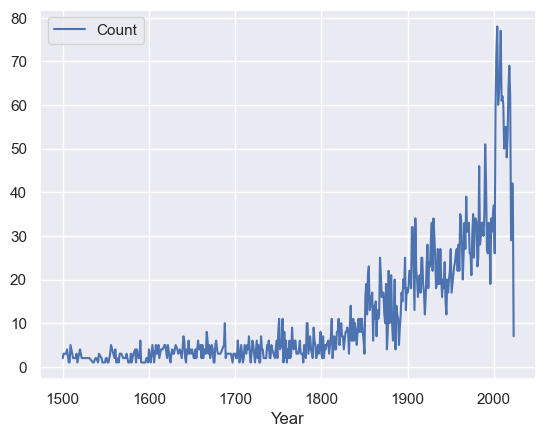

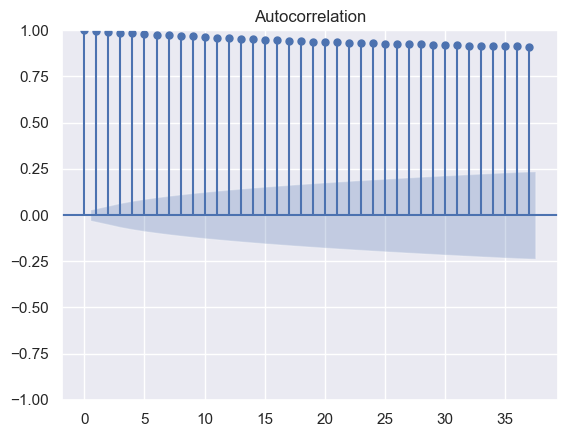

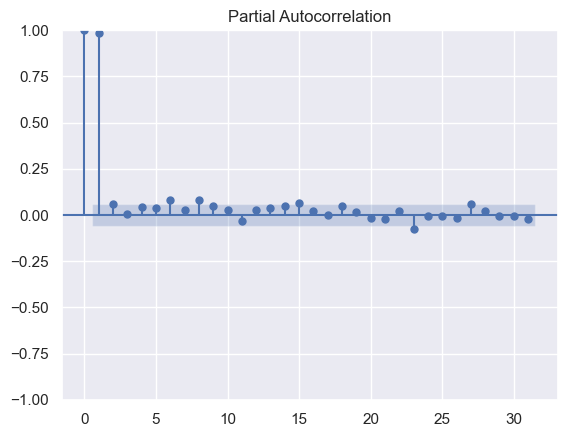

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from statsmodels.tsa.stattools import adfuller

earthqake_yr = earthqake_temp.drop(['Mo'], axis=1)
earthqake_yr.plot()

mask =  np.random.rand(len(earthqake_yr)) < 0.8

earthqake_train = earthqake_yr[mask].copy()
earthqake_test = earthqake_yr[~mask].copy()
print(len(earthqake_train))
print(len(earthqake_test))

acf_original = plot_acf(earthqake_train)

pacf_original = plot_pacf(earthqake_test)


adf_test = adfuller(earthqake_train)
print(f'p-value: {adf_test[1]}')


We can see a gradual decrease in the ACF plot. We can also observe a large spike at lag 1 and a few other ones at lag 2 and 4 in the PACF plot

### Finding the optimal model

In [66]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

p_values = [0,1, 2, 4, 6]
d_values = range(0, 3)
q_values = range(0, 3)
all_errors = dict()
for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                model = ARIMA(earthqake_train, order = order)
                model_fit = model.fit()
                forecast_test = model_fit.forecast(len(earthqake_test))
                error = mean_squared_error(earthqake_test, forecast_test)
                all_errors[order] = error
print(all_errors)

{(0, 0, 0): 395.20891291579863, (0, 0, 1): 394.68605271317324, (0, 0, 2): 394.1189931183558, (0, 1, 0): 920.981884057971, (0, 1, 1): 920.9757177270862, (0, 1, 2): 919.2337022317523, (0, 2, 0): 920.981884057971, (0, 2, 1): 890.6301945622757, (0, 2, 2): 946.7534089777786, (1, 0, 0): 296.04470621129167, (1, 0, 1): 295.91028380552905, (1, 0, 2): 295.9687877390841, (1, 1, 0): 920.981884057971, (1, 1, 1): 399.6288394956458, (1, 1, 2): 400.74140914339625, (1, 2, 0): 920.9818840483401, (1, 2, 1): 881.7217611138906, (1, 2, 2): 997.7592320762154, (2, 0, 0): 295.9121938638678, (2, 0, 1): 331.85308598793, (2, 0, 2): 301.769327871108, (2, 1, 0): 920.981884057971, (2, 1, 1): 400.73742544114305, (2, 1, 2): 398.9752137143459, (2, 2, 0): 14984979.48734256, (2, 2, 1): 881.5206733281052, (2, 2, 2): 961.1193542874752, (4, 0, 0): 297.8185142768495, (4, 0, 1): 297.0588079969779, (4, 0, 2): 371.0968684009555, (4, 1, 0): 864.3595000513245, (4, 1, 1): 398.71833039314697, (4, 1, 2): 400.0373046601127, (4, 2, 0)

#### The model ARIMA(6, 0, 1) seems to perform the best with the mimimum mean square error out of all other models

### Fitting the ARIMA model

In [67]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(earthqake_train, order=(6, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                 4487
Model:                 ARIMA(6, 0, 1)   Log Likelihood               -9118.610
Date:                Sun, 30 Apr 2023   AIC                          18255.219
Time:                        02:11:26   BIC                          18312.900
Sample:                             0   HQIC                         18275.546
                               - 4487                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1870      6.636      4.399      0.000      16.182      42.193
ar.L1          0.6367      1.888      0.337      0.736      -3.064       4.337
ar.L2          0.3350      1.854      0.181      0.8

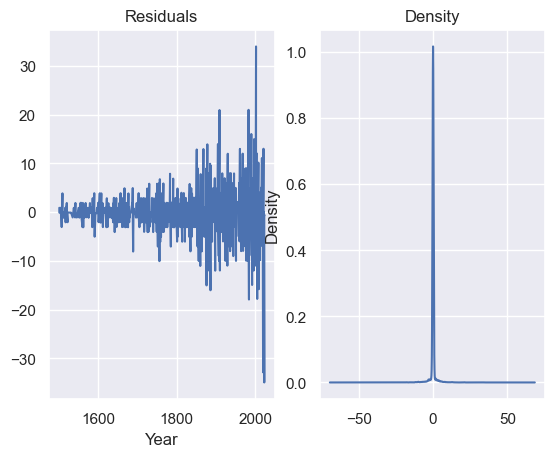

In [68]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

# 5. Predictions

Mean squared Error : 299.78169100586143


<AxesSubplot:xlabel='Year'>

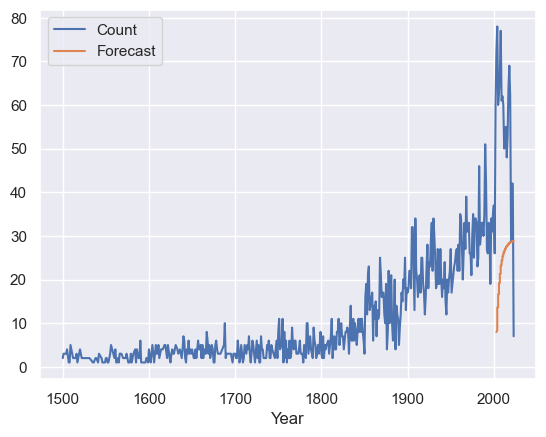

In [92]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error

forecast_test = model_fit.forecast(len(earthqake_test))

earthqake_yr['Forecast'] = [None]*len(earthqake_train) + list(forecast_test)

error = mean_squared_error(earthqake_test, forecast_test)
print('Mean squared Error :',error)
earthqake_yr.plot()

In [97]:
forecast = model_fit.forecast(steps=15)
print(forecast)


4487    7.983113
4488    8.400903
4489    8.849209
4490    8.753374
4491    8.851724
4492    8.887890
4493    8.966729
4494    9.034920
4495    9.111877
4496    9.182506
4497    9.255278
4498    9.326347
4499    9.397799
4500    9.468704
4501    9.539534
Name: predicted_mean, dtype: float64


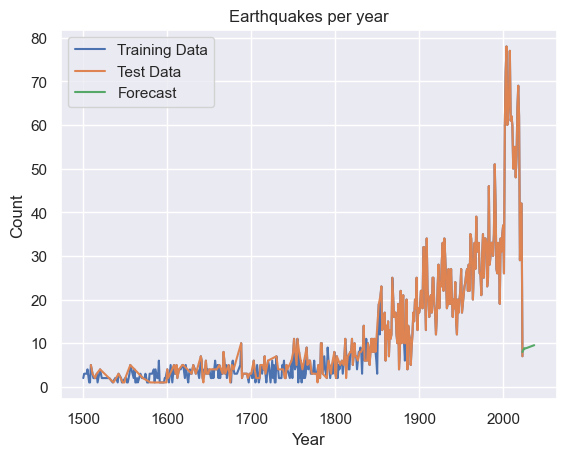

In [99]:
# Plotting the predicted values
plt.plot(earthqake_train.index, earthqake_train, label='Training Data')
plt.plot(earthqake_test.index, earthqake_test, label='Test Data')
plt.plot(np.arange(2023, 2038), forecast, label='Forecast')
plt.title('Earthquakes per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

# 6. Team contributions

Tasks done by each Team Member:


Manali Shelar

*   Performed time series decomposition
*   Created time series visualizatoins using Folium and scatter plots
*   Made predictions on the earthquake data based on the model and generated plots

Aishwarya Hastak
*   Described the attributes and nature of the time series, such as the trend and seasonality.
*  Analysed various model parameters to find the optimal ARIMA model
*  Modelled the time series data using ARIMA model


# Sources



1.   https://www.justintodata.com/arima-models-in-python-time-series-prediction/
2.  https://seaborn.pydata.org/generated/seaborn.scatterplot.html 
3. https://levelup.gitconnected.com/simple-forecasting-with-auto-arima-python-a3f651271965

